#### In the previous analysis, we explored the patterns within data and relationships between features other than the review texts themselves. In this notebook, we would focus on the review texts and try to derive meanful insights from them.

In [1]:
import numpy as np
import pandas as pd

import nltk
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud

Recalled that we saved the cleaned reviews at the end of last analysis, so we are going to load them directly here

In [2]:
reviews = pd.read_csv('../Data/Cleaned_Arcadia_Reviews.csv')
reviews.head()

,CreatedDate,PublishedDate,Username,Hometown,NumUserGeneratedContent,NumHelpfulVote,Review_Title,Review_TripDate,Review_TripType,Review_Text,Review_Rating,Review_HelpfulVotes
0,2020-10-12,2020-10-12,mplegal,"Orlando, Florida",227,46,Nature Lovers’ Shanghai-la!,2020-10-31,COUPLES,Visiting Acadia National Park specifically in ...,5,0
1,2020-10-11,2020-10-11,carolHjones,"Columbus, Georgia",31,21,Great trip,2020-10-31,FAMILY,Beautiful park. Definitely rent bikes in Bar H...,5,0
2,2020-10-11,2020-10-11,rydharter,"Austin, Texas",2,0,Amazing (Civid-Time) Road Trip,2020-10-31,NaN,Acadia was part of my first visit to New Engla...,5,0
3,2020-10-10,2020-10-10,JohnPatsi,"Tullahoma, Tennessee",559,94,Beautiful piece of God’s nature,2020-10-31,COUPLES,Beautiful piece of God’s nature situated along...,5,0
4,2020-10-06,2020-10-06,384katiec,"Indianapolis, Indiana",300,58,Great visit!,2020-09-30,NaN,"As the park ranger explained, this is the swis...",5,0


In [3]:
review_texts = reviews.loc[:, ['Review_Title', 'Review_Text']]

In [4]:
review_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  1757 non-null   object
 1   Review_Text   1757 non-null   object
dtypes: object(2)
memory usage: 27.6+ KB


#### We would like to start our analysis by checking out the most frequently appearing words and see if there are interesting findings

First, let's remove punctuations since we only need words here

In [5]:
def RemovePunctuation(text):
    table = ''.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = text.replace('’', '')
    return text

In [6]:
review_words = review_texts.copy()
review_words['Review_Title'] = review_words['Review_Title'].map(RemovePunctuation)
review_words['Review_Text'] = review_words['Review_Text'].map(RemovePunctuation)

In [7]:
review_words.head()

,Review_Title,Review_Text
0,Nature Lovers Shanghaila,Visiting Acadia National Park specifically in ...
1,Great trip,Beautiful park Definitely rent bikes in Bar Ha...
2,Amazing CividTime Road Trip,Acadia was part of my first visit to New Engla...
3,Beautiful piece of Gods nature,Beautiful piece of Gods nature situated along ...
4,Great visit,As the park ranger explained this is the swiss...


Next, let's remove stopwords. Stopwords are common words that bear little information.

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stop[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
def CleanStopWordsToList(text):
    wordlist = text.lower().split()
    wordlist = list(filter(lambda x: x not in stop, wordlist))
    
    return wordlist

In [10]:
review_title = review_words['Review_Title'].map(CleanStopWordsToList)
review_text = review_words['Review_Text'].map(CleanStopWordsToList)

Finally, let's view the results of most frequently appearing words by generating a word cloud

In [11]:
def GenerateWordCloud(wordlistseries):
    wordlist_all = []
    for item in wordlistseries:
        wordlist_all += item
        
    wordcount_all = {}
    for word in wordlist_all:
        wordcount_all[word] = wordcount_all.get(word, 0) + 1
    
    wc = WordCloud(width=2000, height=1500, background_color='white', min_font_size=6).generate_from_frequencies(wordcount_all)
    
    plt.figure(figsize = (12, 9))
    plt.axis('off')
    plt.imshow(wc)

**For review titles**

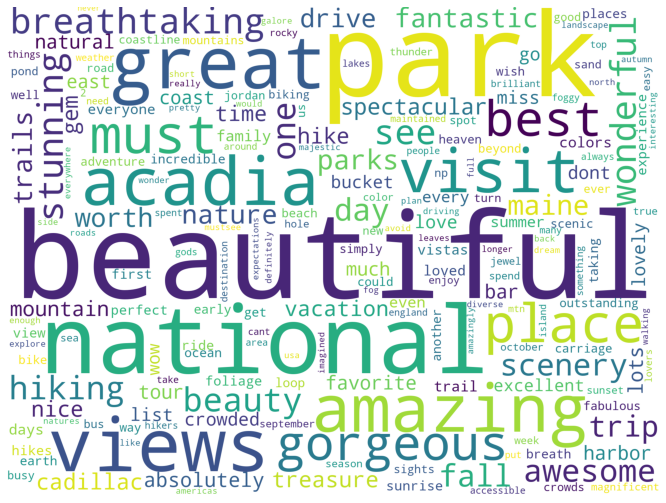

In [12]:
GenerateWordCloud(review_title)